## Project fraud detection

### Objective:
- The objective of this work is to train a classification model that can detect fraud in credit card payments, seeking to provide information, in real time, so that the purchase is not made if a high probability of fraud has been detected.

- O objetivo desse trabalho é treinar um modelo de classificação que possa detectar fraudes no pagamento com cartão de crédito buscando fornecer informações, em tempo real, para que a compra não seja realizada caso tenha detectado alta probabilidade de ser fraude.

### Data Origin:
- Dataset: https://raw.githubusercontent.com/amankharwal/Website-data/master/payment_fraud.csv

- The dataset used is online shopping transaction data collected from an e-commerce retailer. The dataset contains over 39,000 transactions, each containing 5 features that will describe the nature of the transactions.

- O conjunto de dados utilizados são dados de transações de compras online coletados de um varejista de comércio eletrônico. O conjunto de dados contém mais de 39.000 transações, cada uma contendo 5 características que descreverão a natureza das transações.

- Aqui está o que as colunas representam:

    accountAgeDays: idade da conta em dias.

    numItems: nro de items da compra.

    localTime: hora local.

    paymentMethod: cartão utilizado no pagamento.

    paymentMethodAgeDays: tempo em dias que a fatura ficou em aberto até o pagamento.
    
    label: indica se houve fraude (1) ou não (0).

- ## Análise exploratória dos dados
- ## Preparação dos dados
- ## Armazenamento dos dados tratados

In [29]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning

In [30]:
# preparação e visualização de dados
from sklearn.compose import ColumnTransformer # Aplica transformadores a colunas de um array ou pandas DataFrame

from sklearn.preprocessing import OrdinalEncoder # convertendo dados categoricos em numerico (categoria sequencial)
from sklearn.preprocessing import OneHotEncoder # convertendo dados categoricos em numerico (categoria - coluna)

from matplotlib import pyplot # plotagem gráfica
import seaborn as sns # plotagem gráfica baseada em matplotlib
import numpy as np # computação de matrizes

In [31]:
# carregando arquivo de dados
df_fraud = pd.read_csv('dataset/payment_fraud.csv', sep=',')

In [32]:
# verificando a quantidade de linhas e colunas do dataframe
df_fraud.shape

(39221, 6)

In [33]:
# reconhecendo as primeiras linhas do dataframe
df_fraud.head(10)

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0
5,119,1,4.962055,paypal,0.000000,0
6,2000,1,4.921349,paypal,0.000000,0
7,371,1,4.876771,creditcard,0.000000,0
8,2000,1,4.748314,creditcard,0.000000,0
9,4,1,4.461622,creditcard,0.000000,0


In [34]:
# reconhecendo as variáveis disponíveis
# verificando se há dados nulos
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


- Observando que a quantidade de linhas sem nulos é o mesmo da quantidade total de linhas do dataframe, portanto até esse momento não há nulos.

In [35]:
# confirmando a inexistência de nulos
df_fraud.isnull().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
label                   0
dtype: int64

- Confirmando, através da função isnull(), que não existe nenhum nulo nas linhas do dataframe.

In [36]:
# verificando se existe registros duplicados
df_fraud.duplicated().sum()

5726

In [37]:
# eliminando registros duplicados
df_fraud = df_fraud.drop_duplicates()

In [38]:
# verificando quantas linhas restaram
df_fraud.shape

(33495, 6)

In [39]:
# verificando o conteudo de cada coluna (variável) do dataframe
df_fraud.head(10)

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0
3,503,1,4.886641,creditcard,0.000000,0
4,2000,1,5.040929,creditcard,0.000000,0
5,119,1,4.962055,paypal,0.000000,0
6,2000,1,4.921349,paypal,0.000000,0
7,371,1,4.876771,creditcard,0.000000,0
8,2000,1,4.748314,creditcard,0.000000,0
9,4,1,4.461622,creditcard,0.000000,0


- Observamos que temos variáveis categóricas e : paymentMethod sendo as demais algumas contínuas e discretas.
- Nossa variável target (alvo) será a label que identifica se houve fraude ou não (0-não 1-sim)

In [40]:
# listando a relação de colunas
list(df_fraud.columns)

['accountAgeDays',
 'numItems',
 'localTime',
 'paymentMethod',
 'paymentMethodAgeDays',
 'label']

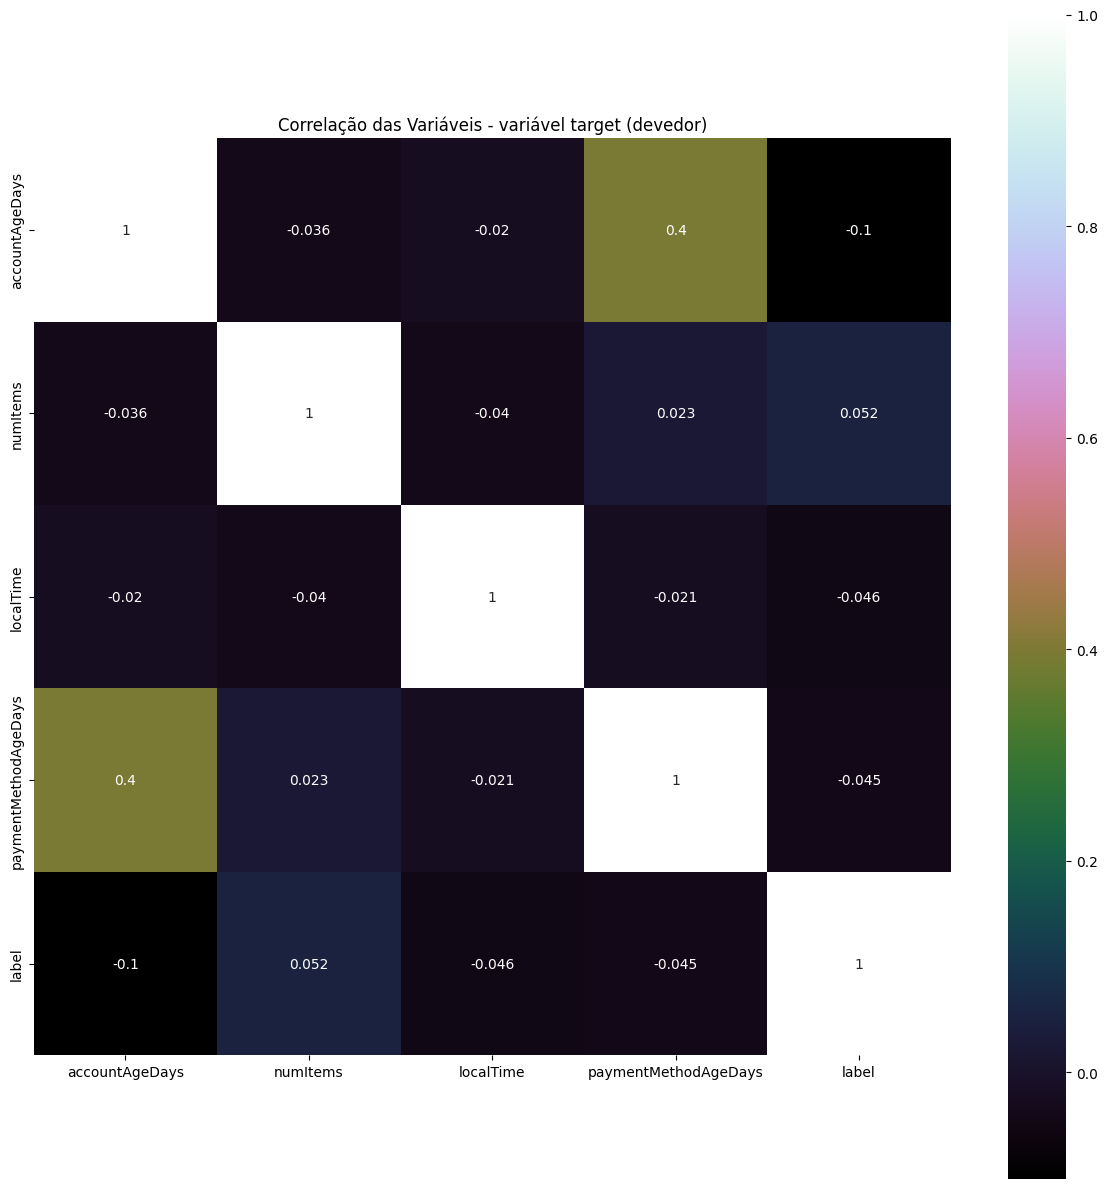

In [41]:
# analisando a correlação entre as variáveis
lista_corr = list(['accountAgeDays',
                    'numItems',
                    'localTime',
                    #'paymentMethod',
                    'paymentMethodAgeDays',
                    'label'])

fig, axs = pyplot.subplots(nrows=1, ncols=1, figsize=(12,12))

correlation = df_fraud[lista_corr].corr()
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix', ax=axs)

axs.set_title('Correlação das Variáveis - variável target (devedor)')
fig.tight_layout()

pyplot.show()

- Todas as colunas apresentam uma correlação maior que 3% com a variável label, dessa forma todas serão consideradas nesse trabalho.

In [42]:
# verificando as colunas do dataframe antes da exclusão
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33495 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        33495 non-null  int64  
 1   numItems              33495 non-null  int64  
 2   localTime             33495 non-null  float64
 3   paymentMethod         33495 non-null  object 
 4   paymentMethodAgeDays  33495 non-null  float64
 5   label                 33495 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


In [43]:
# verificando os dados
df_fraud.head(3)

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.745402,paypal,28.204861,0
1,725,1,4.742303,storecredit,0.000000,0
2,845,1,4.921318,creditcard,0.000000,0


In [44]:
# reduzindo as casas decimais para facilitar o agrupamento dos valores com menor ocorrência
df_fraud['localTime'] = round(df_fraud['localTime'], 2)
df_fraud['paymentMethodAgeDays'] = round(df_fraud['paymentMethodAgeDays'], 0)

In [45]:
# verificando os valores corrigidos do df
df_fraud.head(3)

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
0,29,1,4.75,paypal,28.0,0
1,725,1,4.74,storecredit,0.0,0
2,845,1,4.92,creditcard,0.0,0


In [46]:
# analisando as estatísticas básicas de cada variável
df_fraud[list(df_fraud.columns)].describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label
count,33495.000000,33495.000000,33495.000000,33495.000000,33495.000000
mean,827.790775,1.097149,4.737048,143.111061,0.008777
std,771.376913,0.610850,0.403231,301.286748,0.093277
min,1.000000,1.000000,0.420000,0.000000,0.000000
25%,89.000000,1.000000,4.740000,0.000000,0.000000
50%,591.000000,1.000000,4.890000,1.000000,0.000000
75%,1634.000000,1.000000,4.960000,129.000000,0.000000
max,2000.000000,29.000000,5.040000,2000.000000,1.000000


- Observamos que existem alguns valores minimos e máximos que são bastante expressivos em tamanho e outros bastante pequenos.

In [47]:
# verificando quantos registros restaram
df_fraud.shape

(33495, 6)

In [48]:
# definindo lista de colunas onehot e ordinal para serem transformadas
colunas_ordinal = [ 'paymentMethod']

- A variável categorica 'utilização' terá cada categoria transformada em coluna podendo receber o valor de 0 ou 1, isso devido que, cada categoria dessa variável não tem relação com as outras categorias, dessa forma elas ficarão individualizadas e imunes de qualquer influência de outra categoria.

- As demais colunas que serão transformadas em variáveis categóricas e estão na lista colunas_ordinal, vão ser compostas por faixas de valores do seu conteúdo original, sendo assim uma faixa de valor pode ser influenciada por outra faixa, dessa forma serão convertidas em nros sequenciais, ordinais, representando cada nro uma faixa.

In [49]:
# definindo uma instância do columnTransformer para fazer uma verificação de transformação de variáveis
preprocessing = ColumnTransformer(
    [
        #("0-1", OneHotEncoder(), colunas_onehot),
        ("ord", OrdinalEncoder(), colunas_ordinal),
    ]
)

preprocessing.fit_transform(df_fraud)

array([[1.],
       [2.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [50]:
# fazendo a transformação de variáveis com fit_transform e convertendo para um dataframe
df_fraud_trans = pd.DataFrame(
    preprocessing.fit_transform(df_fraud),
    columns=preprocessing.get_feature_names_out(), 
)

In [51]:
# juntando o dataframe original dos dados categóricos com o dataframe gerado com variáveis transformadas
df_fraud_trans = pd.concat([df_fraud, df_fraud_trans], axis=1)

In [52]:
# verificando a quantidade de registros e colunas
df_fraud_trans.shape

(38094, 7)

In [53]:
# verificando a existência de nulos
df_fraud_trans.isnull().sum()

accountAgeDays          4599
numItems                4599
localTime               4599
paymentMethod           4599
paymentMethodAgeDays    4599
label                   4599
ord__paymentMethod      4599
dtype: int64

- Observamos que cada variável (coluna) possui 373 ocorrências de nulos, em termos de linhas podemos ter mais de 373 ocorrências, pois 1 campo nulo somente pode ocorrer em uma linha. Essas linhas com nulos serão eliminadas.

In [54]:
# apagando os registros que contem nulos
df_fraud_trans = df_fraud_trans.dropna()

In [55]:
# verifica quantas linhas sobraram
df_fraud_trans.shape

(28896, 7)

In [56]:
# salva os dados tratados em arquivo csv organizado pelo índice
df_fraud_trans.sort_index().to_csv('df_treated/df_fraud_trans.csv', index=False)